In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 

# Условие 1: Задача 1
## 1.1. Скачать следующие данные: kc-house-data
 - Постройте график
 - Назовите график
 - Сделайте именование оси x и оси y
 - Сделайте выводы


In [3]:
house = pd.read_csv('kc_house_data.csv', sep=',', encoding='windows-1251', parse_dates=['date'], dayfirst=False)
house.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 1.2. Изучите стоимости недвижимости

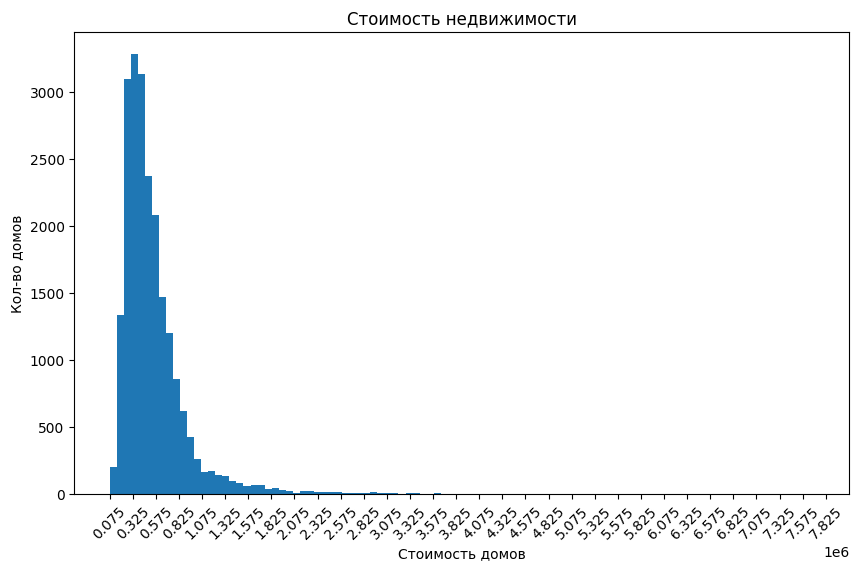

In [4]:
plt.figure(figsize=(10, 6))
plt.hist(house['price'], bins=100);
plt.xlabel('Стоимость домов');
plt.ylabel('Кол-во домов');
plt.title('Стоимость недвижимости');
plt.xticks(range(75000, 8000000, 250000), rotation=45);

In [5]:
house1 = house[house["price"]<=1300000]

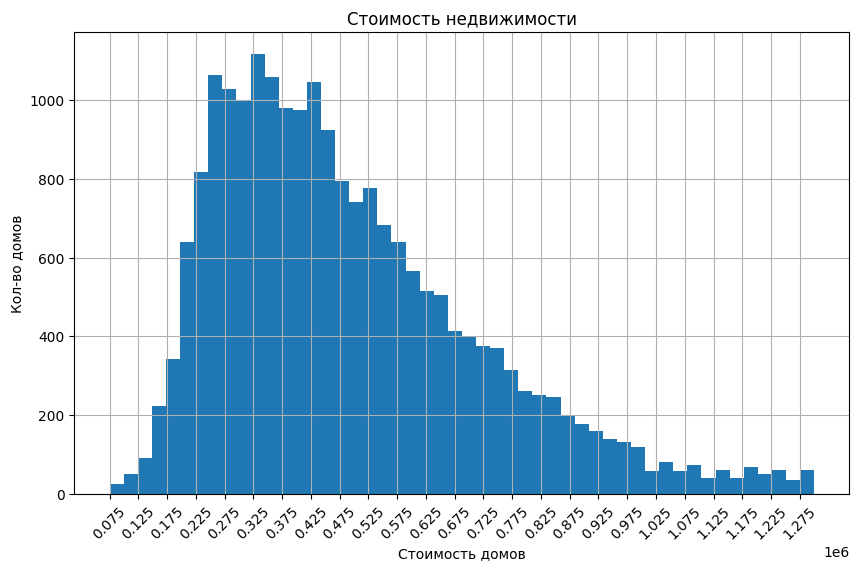

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(house1['price'], bins=50);
plt.xlabel('Стоимость домов');
plt.ylabel('Кол-во домов');
plt.title('Стоимость недвижимости');
plt.xticks(range(75000, 1300000, 50000), rotation=45);
plt.grid();

### Выводы: больше всего домов построено в ценовом диапазоне от 225 000 до 470 000.

## 1.3. Изучите распределение квадратуры жилой площади

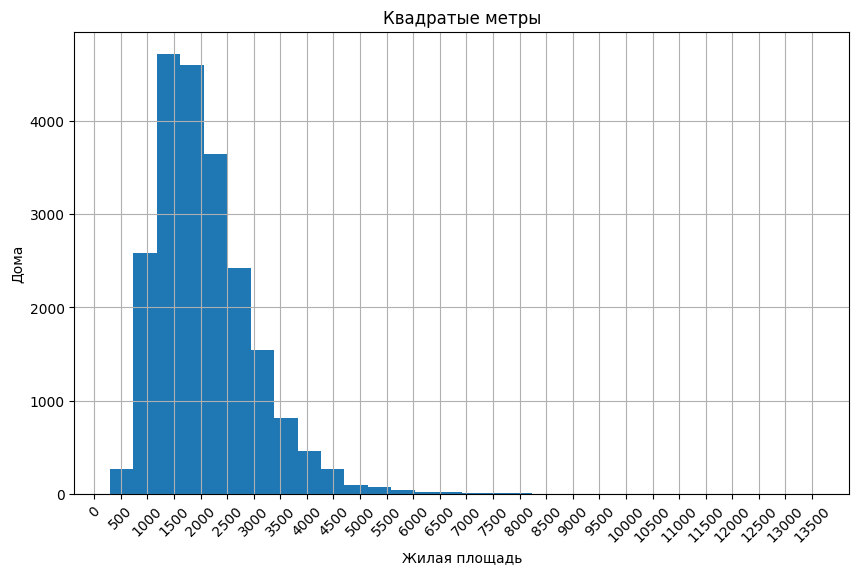

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(house['sqft_living'], bins=30);
plt.xlabel('Жилая площадь');
plt.ylabel('Дома');
plt.title('Квадратые метры');
plt.xticks(range(0,14000, 500), rotation=45);
plt.grid();

In [8]:
house2 = house[house["sqft_living"]<=4300]

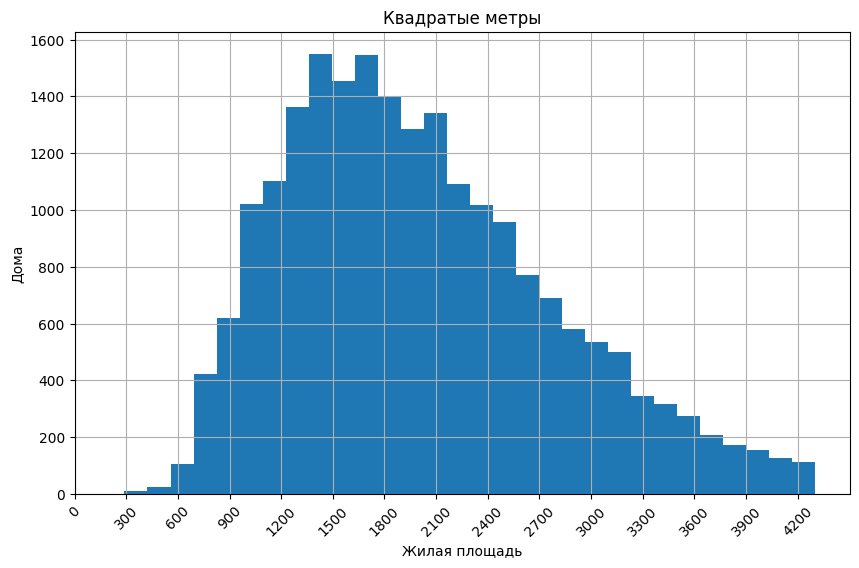

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(house2['sqft_living'], bins=30);
plt.xlabel('Жилая площадь');
plt.ylabel('Дома');
plt.title('Квадратые метры');
plt.xticks(range(0,4300, 300), rotation=45);
plt.grid();

### Вывод: больше всего домов построено с жилой площадью от 1000 до 2500 кв.м.

## 1.4. Изучите распределение года постройки

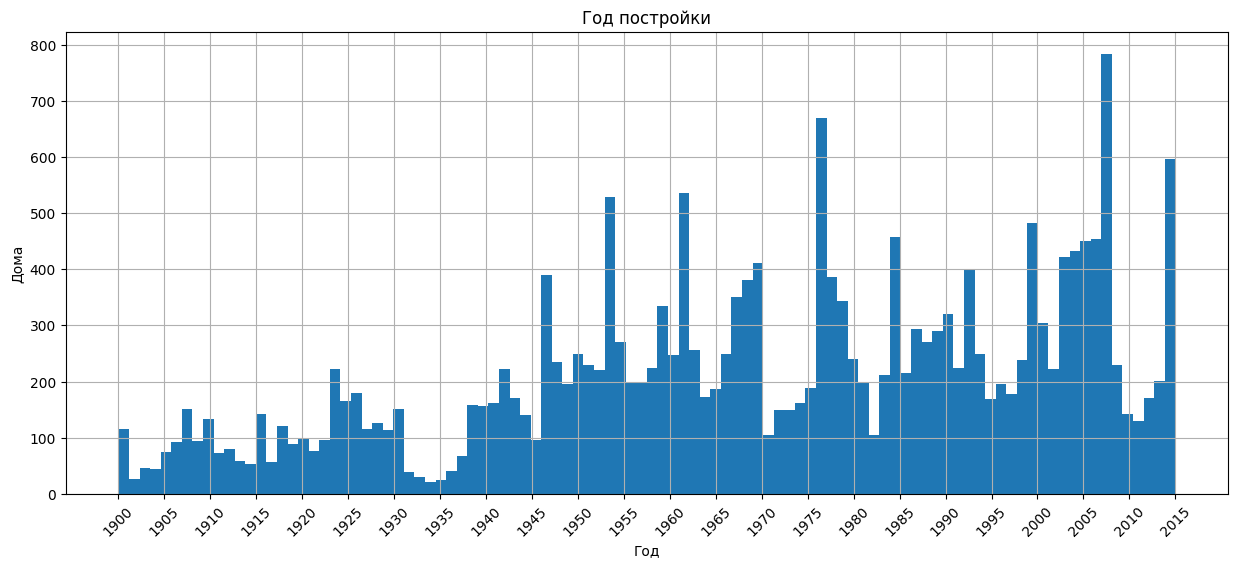

In [10]:
plt.figure(figsize=(15, 6))
plt.hist(house['yr_built'], bins=100);
plt.xlabel('Год');
plt.ylabel('Дома');
plt.title('Год постройки');
plt.xticks(range(1900,2020, 5), rotation=45);
plt.grid();

### Вывод: больше всего домов построено в период с 1953 по 2015 годы.

# Условие 2: 2 задача
### 2.1. Изучите распределение домов от наличия вида на набережную
- Постройте график
- Сделайте выводы

In [11]:
house3 = house['waterfront'].value_counts()
house3 = house3.rename(index={0: "Нет вида на набережную", 1: "Есть вид на набережную"})

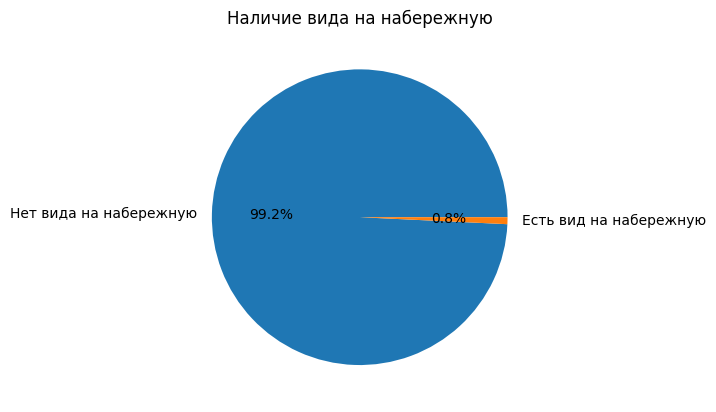

In [12]:
plt.pie(house3.values, labels=house3.index, autopct='%.1f%%');
plt.title('Наличие вида на набережную');

### Выводы: менее чем у одного процента домов есть вид на набережную.

### 2.2. Изучите распределение этажей домов
- Постройте график
- Сделайте выводы


In [13]:
house4 = house['floors'].value_counts()

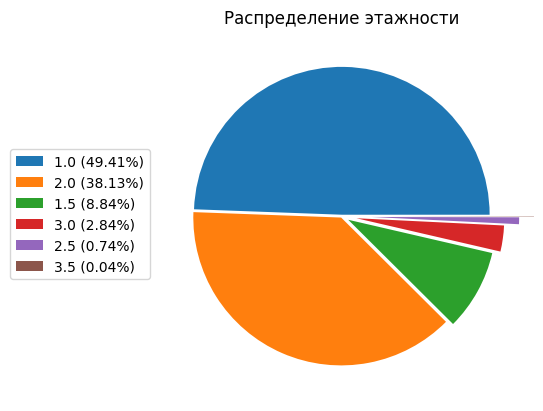

In [14]:
explode = (0.01, 0.01, 0.05, 0.1, 0.2, 0.3);
pie = plt.pie(house4.values, explode=explode);
total = sum(house4.values);
labels = [f"{name} ({value / total:.2%})" for name, value in zip(house4.index, house4.values)];
plt.legend(
    bbox_to_anchor = (-0.25, 0.45, 0.25, 0.25), labels = labels )
plt.title('Распределение этажности');

### Выводы: дома с этажостью 2.5 и выше занимают менее 4% от общего количества домов, одноэтажные дома занимают почти 50%.

### 2.3. Изучите распределение состояния домов
- Постройте график
- Сделайте выводы

In [15]:
house5 = house['condition'].value_counts()

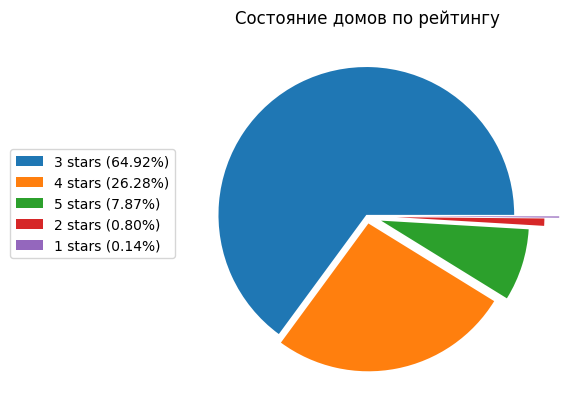

In [16]:
explode = (0.01, 0.05, 0.1, 0.2, 0.3);
pie = plt.pie(house5.values, explode=explode);
total = sum(house5.values);
labels = [f"{name} stars ({value / total:.2%})" for name, value in zip(house5.index, house5.values)];
plt.legend(
    bbox_to_anchor = (-0.25, 0.45, 0.25, 0.25), labels = labels )
plt.title('Состояние домов по рейтингу');

### Выводы: дома c рейтингом "3" занимают 2/3 от общего числа домов, а с самым низким рейтингом занимают мененее 1% от общего количества домов.

# Условие 3: 3 задача
### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
### Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [17]:
house6 = house.sort_values(by='price', ascending=True)

In [18]:
house6 = house6[house6["price"]<=4000000]
house7 = house6[house6['sqft_living']<=8000]

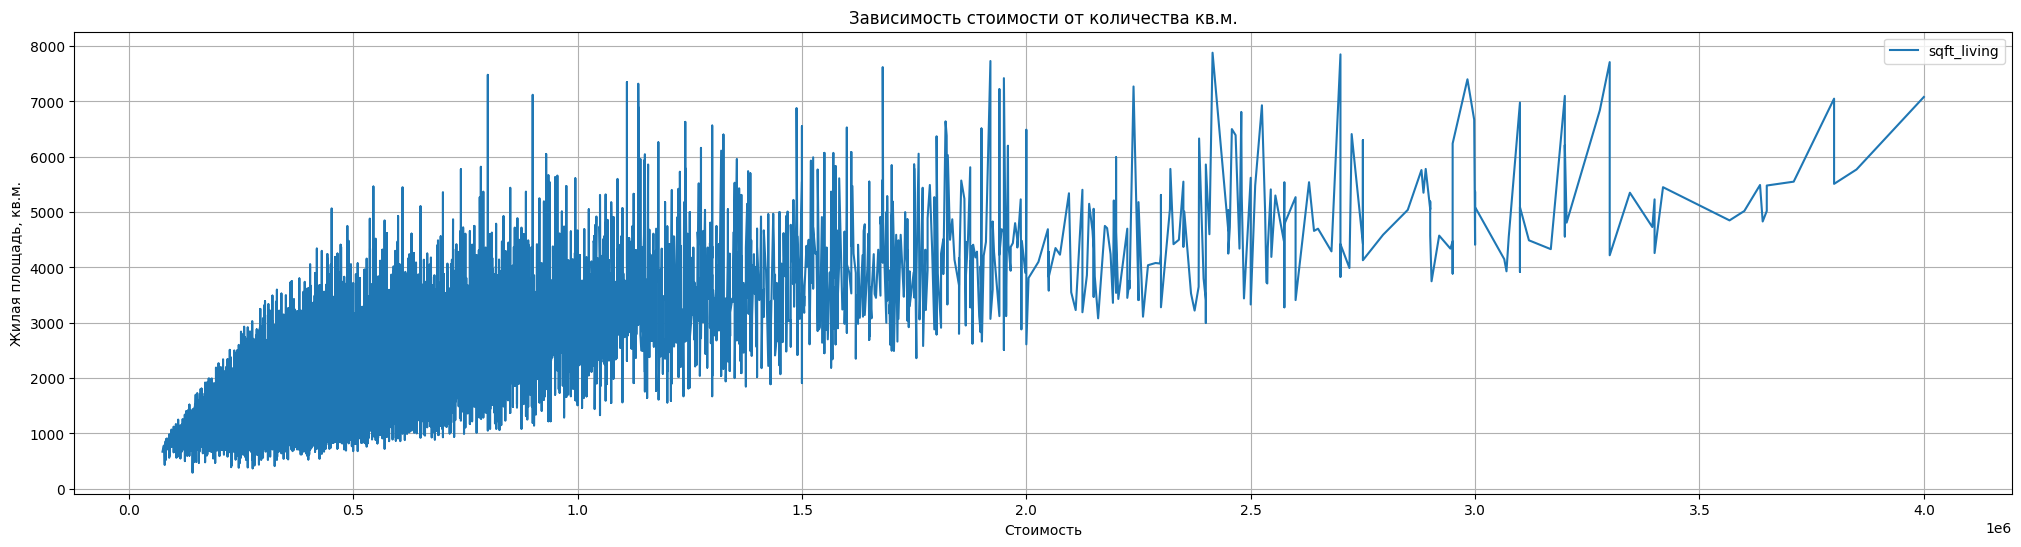

In [19]:
house7.plot(y='sqft_living', x='price', figsize=(25, 6), xlabel='Стоимость', 
            ylabel='Жилая площадь, кв.м.', title='Зависимость стоимости от количества кв.м.', grid=True);

In [20]:
house8 = house7[house7["price"]<=2000000]

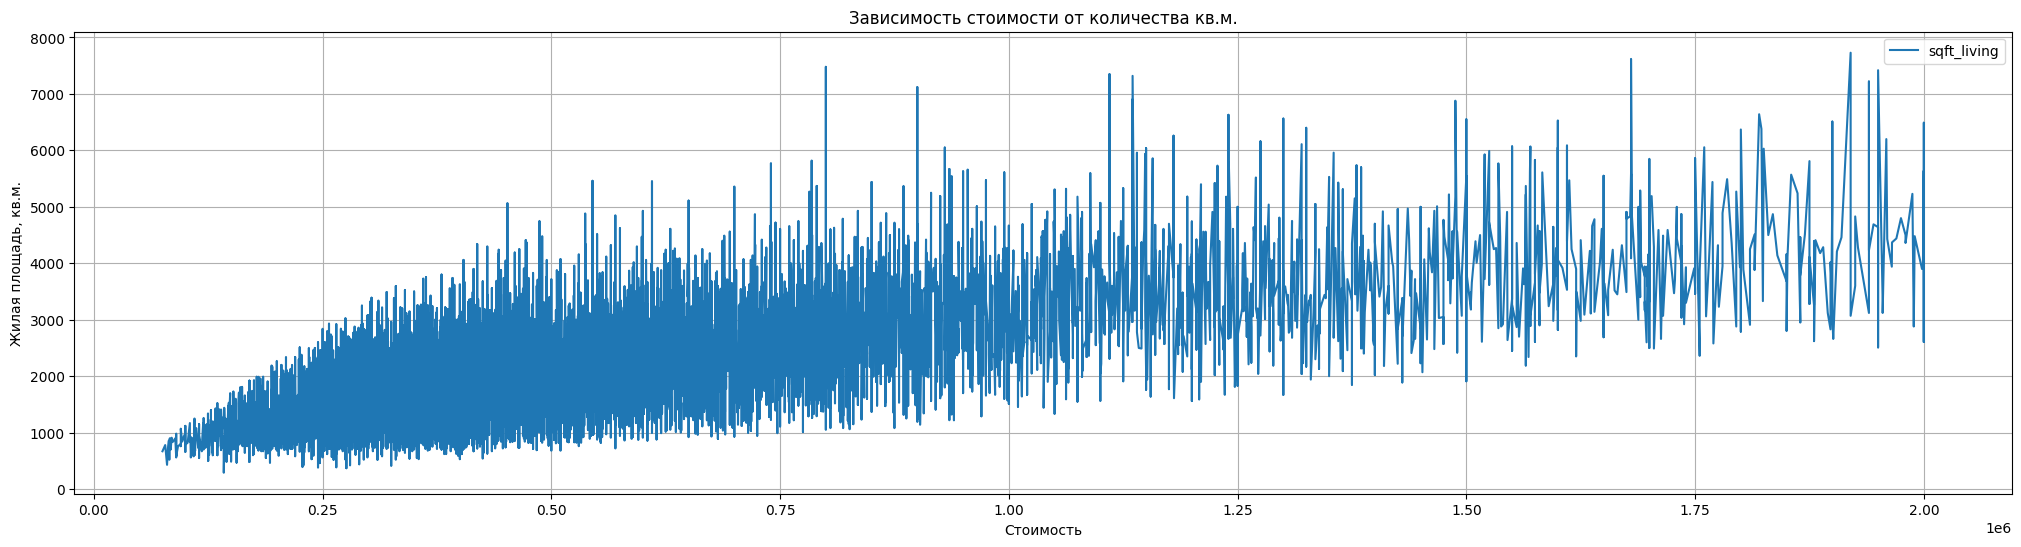

In [21]:
house8.plot(y='sqft_living', x='price', figsize=(25, 6), xlabel='Стоимость', 
            ylabel='Жилая площадь, кв.м.', title='Зависимость стоимости от количества кв.м.', grid=True);

### Как видно из графиков цена дома до 500 тысяч находится в прямой зависимости от жилой площади, после 500 тысяч жилая площать слабо влияет на стоимость.

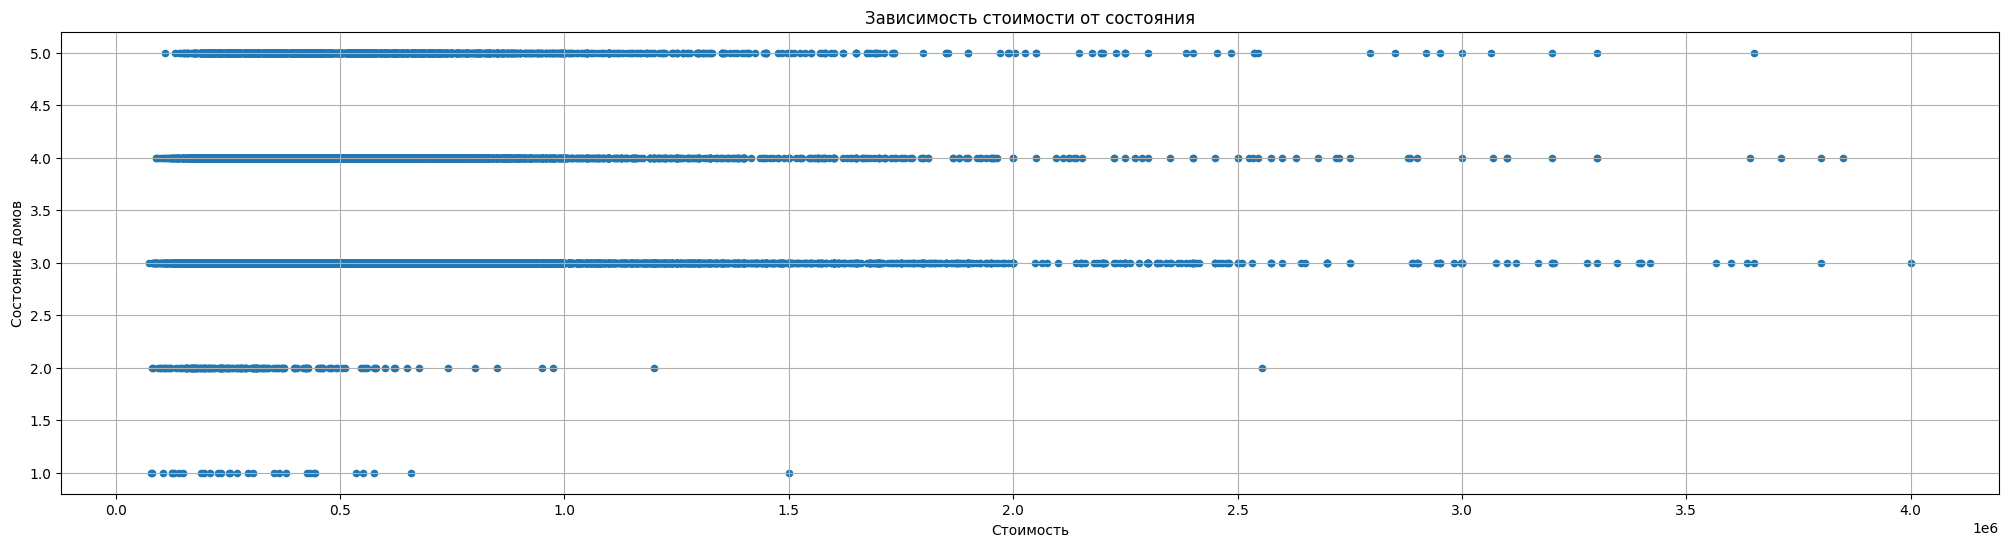

In [22]:
house6.plot(y='condition', x='price', figsize=(25, 6), xlabel='Стоимость', 
            ylabel='Состояние домов', title='Зависимость стоимости от состояния', grid=True, kind='scatter');

### Как видно из графика состояние дома часто оценивается ниже 3 при цене домов до 600 тысяч.
### После 600 тысяч состояние домов удовлетворительное и выше. Состояние никак не влияет на увеличение стоимости домов после 600 тысяч.

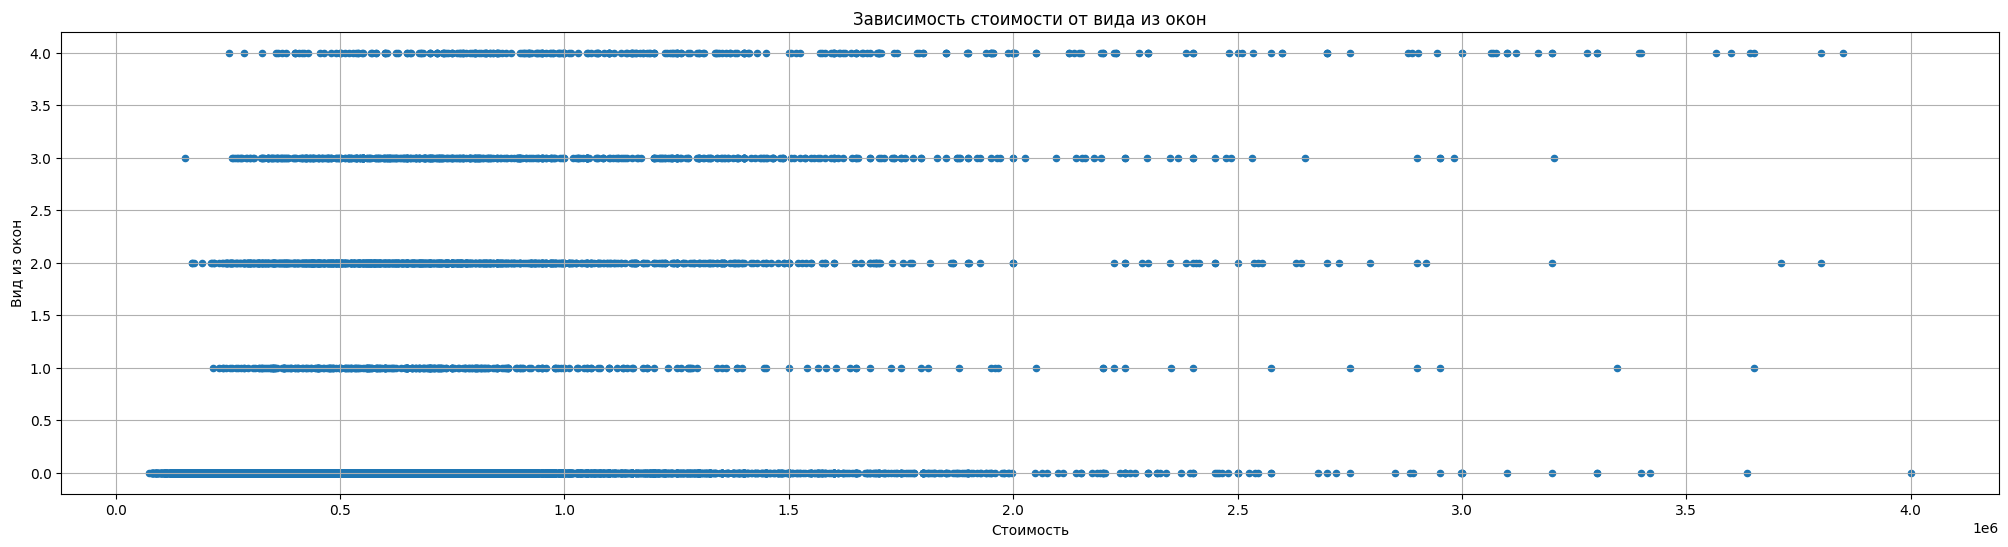

In [23]:
house6.plot(y='view', x='price', figsize=(25, 6), xlabel='Стоимость', 
            ylabel='Вид из окон', title='Зависимость стоимости от вида из окон', grid=True, kind='scatter');

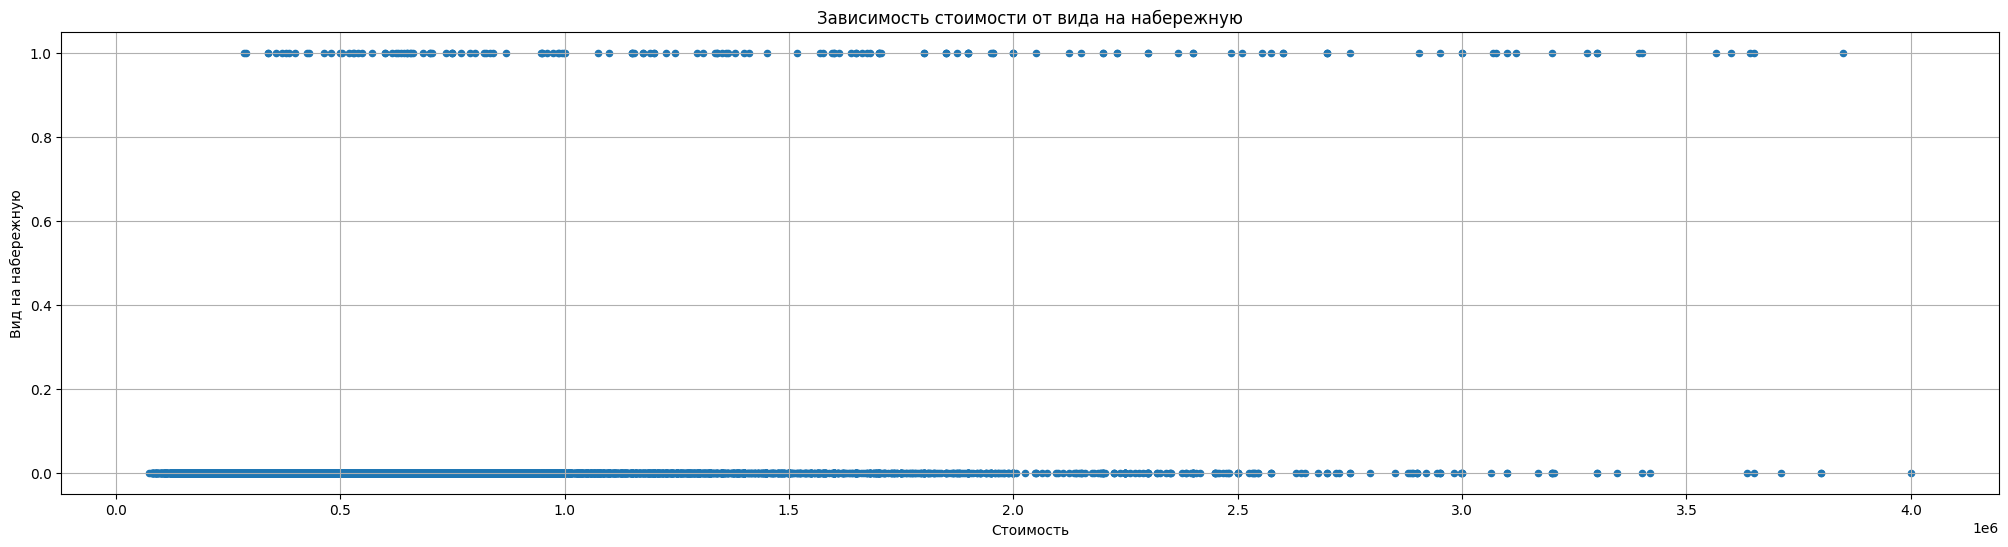

In [24]:
house6.plot(y='waterfront', x='price', figsize=(25, 6), xlabel='Стоимость', 
            ylabel='Вид на набережную', title='Зависимость стоимости от вида на набережную', grid=True, kind='scatter');

### Вид из окон и вид на набережную слабо влияет на стоимость дома - до 2 млн. плохой вид присутсвует чаще, однако самый дорогой дом также имеет оценку вида из окон - 0 и вид на набережную отсутствует.

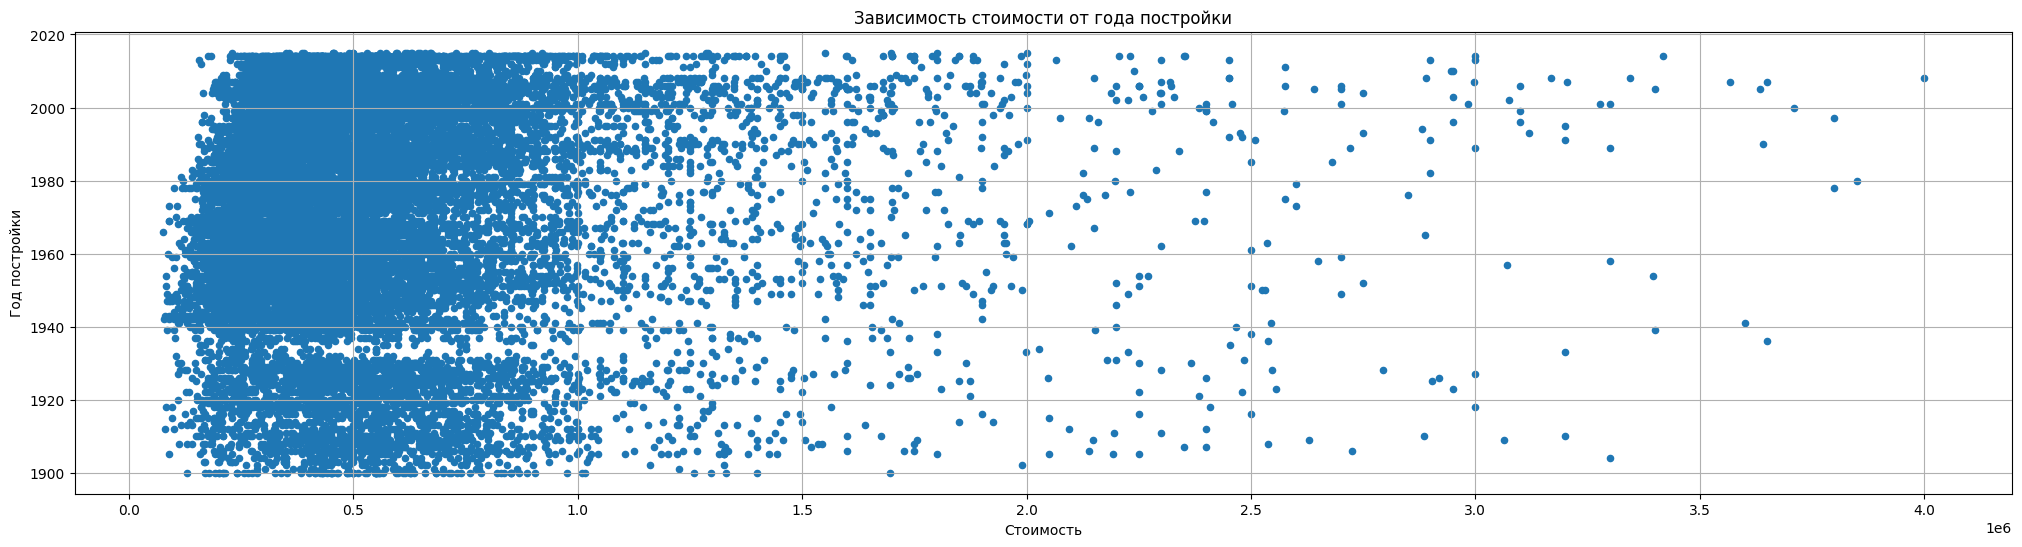

In [25]:
house6.plot(y='yr_built', x='price', figsize=(25, 6), xlabel='Стоимость', 
            ylabel='Год постройки', title='Зависимость стоимости от года постройки', grid=True, kind='scatter');

### Год постройки также не имеет сильной зависимости от стоимости домов - и в дешевом и в дорогом сегменте присутсвуют дома как 1900-1920 годов постройки, так и 2000-2020 годов.

## Вывод: ценообразование домов до 600 тысяч имеет зависимость от жилой площади и от состояния, однако дальнейшее ценообразование не имеет сильных зависимостей от проанализированных параметров.